In [45]:
# Package Imports 
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [46]:
def create_ev_bins(value):
    if value < 1:
        return 1
    elif value >= 1 and value < 2:
        return 2
    elif value >= 2 and value < 3:
        return 3
    elif value >= 3 and value < 4:
        return 4
    elif value >= 4 and value < 5:
        return 5
    elif value >= 5 and value < 6:
        return 6
    elif value >= 6 and value < 7:
        return 7
    elif value >= 7 and value < 8:
        return 8
    elif value >= 8 and value < 9:
        return 9
    elif value > 9:
        return 10

In [63]:
data_files = ['BetRivers_player_shots_on_goal.csv',]

dfs = []

for f in data_files:
    temp  = pd.read_csv('./output_data/' + f)
    dfs.append(temp)

data = pd.concat(dfs)
data['ev_bin'] = data['ev'].apply(create_ev_bins)
data.shape

(1756, 36)

In [64]:
data['normalized_bet_type'].value_counts()

player_shots_on_goal    1756
Name: normalized_bet_type, dtype: int64

# SHOW BET COMPARISON

In [65]:
both_mask = data['ev'].notna() & data['oj_ev'].notna()
bet_matches = data[both_mask].copy()
print(bet_matches.shape)

(49, 36)


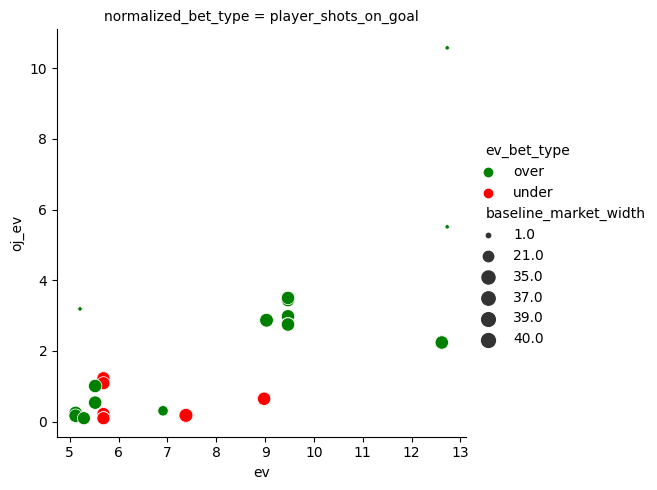

In [66]:
sns.relplot(data=bet_matches, x="ev", y="oj_ev", hue='ev_bet_type', size='baseline_market_width', col='normalized_bet_type', sizes=(10, 100), palette=["g", "r"])

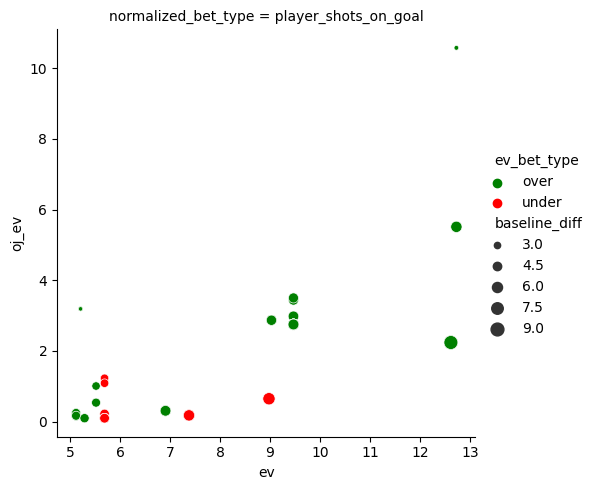

In [67]:
sns.relplot(data=bet_matches, x="ev", y="oj_ev", hue='ev_bet_type', size='baseline_diff', col='normalized_bet_type', sizes=(10, 100), palette=["g", "r"])

# SHOW BETS WHERE BASELINE IS HIGHER

In [68]:
baseline_bet_matches =bet_matches[bet_matches['baseline_is_higher'] == True].copy()

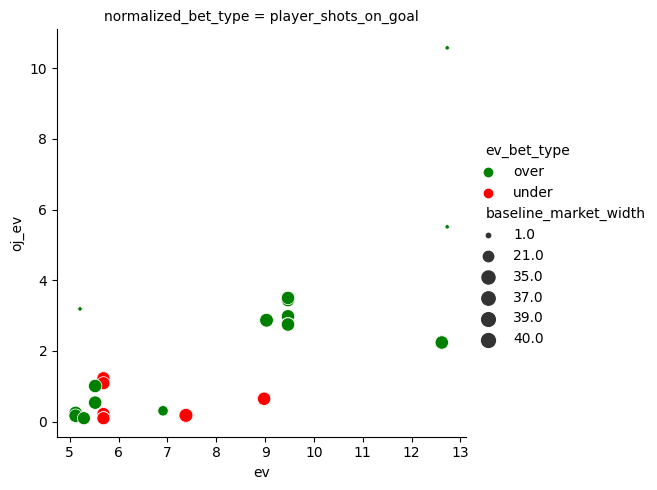

In [69]:
sns.relplot(data=baseline_bet_matches, x="ev", y="oj_ev", hue='ev_bet_type', size='baseline_market_width',  col='normalized_bet_type', sizes=(10, 100), palette=["g", "r"])

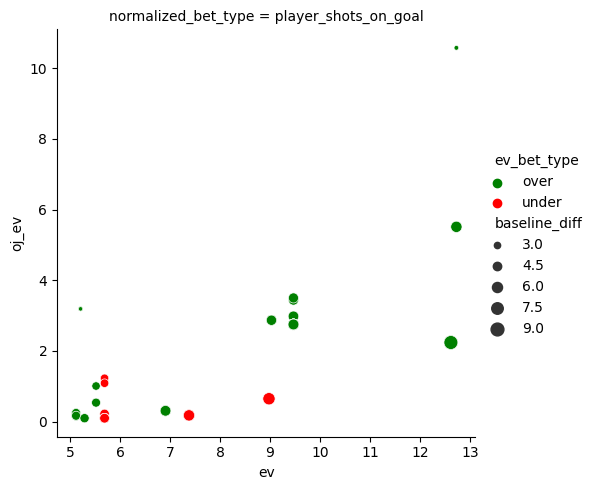

In [70]:
sns.relplot(data=baseline_bet_matches, x="ev", y="oj_ev", hue='ev_bet_type', size='baseline_diff', col='normalized_bet_type', sizes=(10, 100), palette=["g", "r"])

# SHOW UNIQUE BETS THAT OJ ISN'T PICKING UP

In [71]:
unique_mask = data['ev'].notna() & data['oj_ev'].isnull() 
unique_matches = data[unique_mask].copy()
# DROP EV MATCHES OVER 10
unique_matches = unique_matches[unique_matches['ev'] <= 10]
unique_matches.shape

(1587, 36)

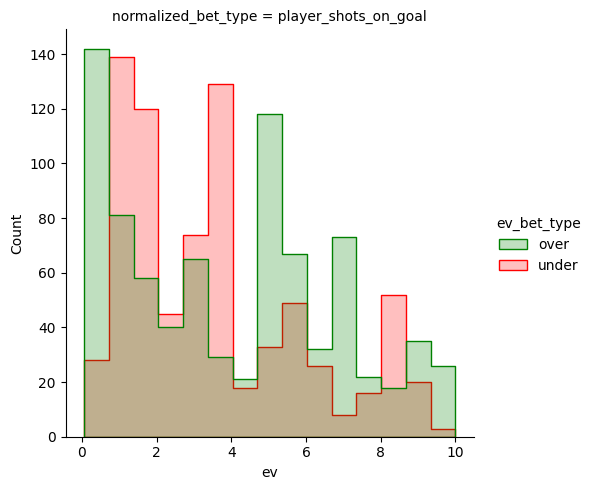

In [72]:
sns.displot(unique_matches, x="ev", col='normalized_bet_type', hue='ev_bet_type', element="step", palette=["g", "r"])

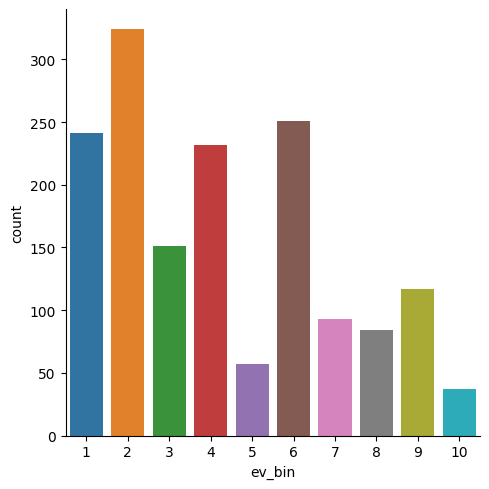

In [73]:
ev_counts = unique_matches['ev_bin'].value_counts().reset_index().sort_index()
ev_counts.columns = ['ev_bin', 'count']

sns.catplot(data=ev_counts, kind="bar", x="ev_bin", y="count")